# Initial Scraping Data Code

In [22]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Load needed libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

In [24]:
# Setup Selenium WebDriver
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
driver = webdriver.Chrome(service=Service(), options=options)

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

# 1. Generate all the Saturdays from Jan 4, 2025 to today
start_date = datetime(2025, 1, 4)  # First Saturday of January 2025
end_date = datetime.today()

dates = []
current_date = start_date
while current_date <= end_date:
    dates.append(current_date.strftime('%Y-%m-%d'))
    current_date += timedelta(weeks=1)

# 2. Function to scrape a single week
def scrape_billboard_week(date):
    url = f"https://www.billboard.com/charts/hot-100/{date}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    songs = []
    chart_list = soup.select('li.o-chart-results-list__item h3')

    if not chart_list:  # if no songs found, page might not exist
        print(f"No chart found for {date}.")
        return []

    titles = soup.select('li.o-chart-results-list__item h3')
    artists = soup.select('li.o-chart-results-list__item span.c-label.a-no-trucate')
    ranks = soup.select('li.o-chart-results-list__item span.c-label.a-font-primary-bold-l')

    for rank, title, artist in zip(ranks, titles, artists):
        song_title = title.get_text(strip=True)
        artist_name = artist.get_text(strip=True)
        song_rank = rank.get_text(strip=True)

        songs.append({'date': date, 'rank': song_rank, 'title': song_title, 'artist': artist_name})

    return songs
      

In [26]:

# 3. Loop through all weeks
all_songs = []

for date in dates:
    try:
        weekly_songs = scrape_billboard_week(date)
        if weekly_songs:
            all_songs.extend(weekly_songs)
            print(f"Scraped {date} with {len(weekly_songs)} songs.")
    except Exception as e:
        print(f"Failed to scrape {date}: {e}")

# 4. Save to a CSV
df = pd.DataFrame(all_songs)
df.to_csv('billboard_hot100_from_jan2025.csv', index=False)

print("Done! Saved all data to 'billboard_hot100_from_jan2025.csv'.")


Scraped 2025-01-04 with 100 songs.
Scraped 2025-01-11 with 100 songs.
Scraped 2025-01-18 with 100 songs.
Scraped 2025-01-25 with 100 songs.
Scraped 2025-02-01 with 100 songs.
Scraped 2025-02-08 with 100 songs.
Scraped 2025-02-15 with 100 songs.
Scraped 2025-02-22 with 100 songs.
Scraped 2025-03-01 with 100 songs.
Scraped 2025-03-08 with 100 songs.
Scraped 2025-03-15 with 100 songs.
Scraped 2025-03-22 with 100 songs.
Scraped 2025-03-29 with 100 songs.
Scraped 2025-04-05 with 100 songs.
Scraped 2025-04-12 with 100 songs.
Scraped 2025-04-19 with 100 songs.
Scraped 2025-04-26 with 100 songs.
Done! Saved all data to 'billboard_hot100_from_jan2025.csv'.


In [32]:
display(df)

,date,rank,title,artist
0,2025-01-04,1,All I Want For Christmas Is You,Mariah Carey
1,2025-01-04,1,Rockin' Around The Christmas Tree,Brenda Lee
2,2025-01-04,1,Last Christmas,Wham!
3,2025-01-04,71,Jingle Bell Rock,Bobby Helms
4,2025-01-04,1,Santa Tell Me,Ariana Grande
...,...,...,...,...
1695,2025-04-26,90,like JENNIE,JENNIE
1696,2025-04-26,91,Not At This Party,Dasha
1697,2025-04-26,92,Whiskey Drink,Jason Aldean
1698,2025-04-26,93,Little Things,Ella Mai


# Integration

In [38]:
import pandas as pd
from thefuzz import fuzz
from thefuzz import process

# Load your datasets
billboard = pd.read_csv("billboard_hot100_from_jan2025.csv")
spotify = pd.read_csv("universal_top_spotify_songs.csv")
spotify

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,4/2/2025,88,False,...,6,-7.727,0,0.0317,0.2890,0.000000,0.1260,0.498,157.964,3
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,1,1,NaN,4/2/2025,99,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
2,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,3,1,47,NaN,4/2/2025,73,False,...,2,-6.141,1,0.0600,0.7040,0.000007,0.0550,0.391,168.115,3
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,-2,-2,NaN,4/2/2025,92,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.3550,0.939,149.027,4
4,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",5,1,0,NaN,4/2/2025,94,False,...,2,-7.546,1,0.1250,0.2510,0.000000,0.2480,0.576,138.008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6tbEF9YpayX9uqAA5ezx1j,Nārnija,"OLAS, Esmeralda, heywhosthatkid",10,0,0,LV,6/7/2024,50,True,...,6,-3.433,0,0.0665,0.2420,0.000000,0.2220,0.563,124.950,4
1048571,7iabz12vAuVQYyekFIWJxD,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",11,0,2,LV,6/7/2024,88,True,...,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113,4
1048572,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,12,0,-5,LV,6/7/2024,97,True,...,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
1048573,48lxT5qJF0yYyf2z4wB4xW,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",13,2,7,LV,6/7/2024,90,False,...,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019,4


In [40]:
billboard.rename(columns={
    'title': 'track_name',
    'artist': 'artist'
}, inplace=True)

# Normalize text fields for consistent matching
billboard['track_name'] = billboard['track_name'].str.lower().str.strip()
billboard['artist'] = billboard['artist'].str.lower().str.strip()

spotify['name'] = spotify['name'].str.lower().str.strip()
spotify['artists'] = spotify['artists'].str.lower().str.strip()

# Extract primary artist from Spotify artist list, safely
spotify['primary_artist'] = spotify['artists'].apply(lambda x: str(x).split(',')[0].strip())
spotify = spotify[spotify['primary_artist'] != 'nan']  # filter out bad rows

# Fuzzy matching
matched_rows = []

for idx, row in billboard.iterrows():
    bb_title = row['track_name']
    bb_artist = row['artist']

    # Try to filter Spotify 
    artist_keyword = bb_artist.split()[0]
    subset = spotify[spotify['primary_artist'].str.contains(artist_keyword, na=False)]

    if not subset.empty:
        try:
            result = process.extractOne(bb_title, subset['name'], scorer=fuzz.token_sort_ratio)
            if result:
                match_title = result[0]
                score = result[1]
                if score >= 50:
                    match_row = subset[subset['name'] == match_title].iloc[0]
                    combined = {**row.to_dict(), **match_row.to_dict()}
                    matched_rows.append(combined)
        except Exception as e:
            print(f"Error matching '{bb_title}' by '{bb_artist}': {e}")

# Create final DataFrame
merged_df = pd.DataFrame(matched_rows)

# Export merged results
merged_df.to_csv("Cleaned_Merged_Billboard_Spotify.csv", index=False)

# summary
print(f" Successfully merged {merged_df.shape[0]} songs.")
display(merged_df.head())

 Successfully merged 1339 songs.


,date,rank,track_name,artist,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,2025-01-04,1,all i want for christmas is you,mariah carey,0bYg9bo50gSsH3LtXe2SQn,all i want for christmas is you,mariah carey,14,0,-4,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,2025-01-04,1,rockin' around the christmas tree,brenda lee,2EjXfH91m7f8HiJN1yQg97,rockin' around the christmas tree,brenda lee,45,-10,-29,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,2025-01-04,1,last christmas,wham!,2FRnf9qhLbvw8fu4IBXx78,last christmas,wham!,29,-22,-20,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,2025-01-04,71,jingle bell rock,bobby helms,7vQbuQcyTflfCIOu3Uzzya,jingle bell rock,bobby helms,37,-4,-20,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,2025-01-04,1,santa tell me,ariana grande,0lizgQ7Qw35od7CYaoMBZb,santa tell me,ariana grande,48,-15,-42,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande


In [42]:
merged_df

,date,rank,track_name,artist,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,2025-01-04,1,all i want for christmas is you,mariah carey,0bYg9bo50gSsH3LtXe2SQn,all i want for christmas is you,mariah carey,14,0,-4,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,2025-01-04,1,rockin' around the christmas tree,brenda lee,2EjXfH91m7f8HiJN1yQg97,rockin' around the christmas tree,brenda lee,45,-10,-29,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,2025-01-04,1,last christmas,wham!,2FRnf9qhLbvw8fu4IBXx78,last christmas,wham!,29,-22,-20,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,2025-01-04,71,jingle bell rock,bobby helms,7vQbuQcyTflfCIOu3Uzzya,jingle bell rock,bobby helms,37,-4,-20,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,2025-01-04,1,santa tell me,ariana grande,0lizgQ7Qw35od7CYaoMBZb,santa tell me,ariana grande,48,-15,-42,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2025-04-26,86,tattoo,tito double p,3KgHiAVuP88QoQs9CO4z1P,tattoo,tito double p,21,-2,0,...,-4.278,0,0.0656,0.4820,0.000005,0.0853,0.463,109.897,3,tito double p
1335,2025-04-26,87,headlock,imogen heap,63Pi2NAx5yCgeLhCTOrEou,headlock,imogen heap,45,1,2,...,-10.759,0,0.0364,0.7920,0.000000,0.1190,0.787,119.982,4,imogen heap
1336,2025-04-26,89,por esos ojos,fuerza regida,5jHozZMWbrExAFni95mvvH,por esos ojos,fuerza regida,9,-3,11,...,-6.978,0,0.1060,0.2940,0.000000,0.1910,0.511,102.462,3,fuerza regida
1337,2025-04-26,90,like jennie,jennie,0fK7ie6XwGxQTIkpFoWkd1,like jennie,jennie,11,-1,-2,...,-5.321,0,0.0611,0.2810,0.006710,0.0868,0.815,130.019,4,jennie


In [44]:
# Convert dataframe to CSV
merged_df.to_csv("Merged_billboard_hot_100_spotify.csv", index=False)

# Cleaning

In [95]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv("Merged_billboard_hot_100_spotify.csv")

# Step 1: Drop full duplicates
df = df.drop_duplicates()

# Step 2: Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Clean text columns (lowercase and strip spaces)
text_columns = ['track_name', 'name', 'artist', 'artists', 'primary_artist']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

# Step 4: Combine and overwrite song title
df['title'] = df.apply(
    lambda row: f"{row['track_name']} / {row['name']}" if row['track_name'] != row['name'] else row['track_name'],
    axis=1
)

# Step 5: Combine and overwrite artist
df['artist_combined'] = df.apply(
    lambda row: f"{row['artist']} / {row['artists']}" if row['artist'] != row['artists'] else row['artist'],
    axis=1
)

# Step 6: Drop original duplicate columns
df = df.drop(columns=['track_name', 'name', 'artist', 'artists'])

# Step 7: Drop duplicate songs based on title
df = df.drop_duplicates(subset=['title'])

# Step 8: Reorder columns (title and artist_combined first)
columns = ['title', 'artist_combined'] + [col for col in df.columns if col not in ['title', 'artist_combined']]
df = df[columns]

# Step 9: Save cleaned file
df.to_csv("Cleaned_Billboard_Spotify_Final.csv", index=False)

# Step 10: Show results
print(f" Cleaned and replaced titles/artists. Final Rows: {df.shape[0]}")
display(df.head())

 Cleaned and replaced titles/artists. Final Rows: 273


,title,artist_combined,date,rank,spotify_id,daily_rank,daily_movement,weekly_movement,country,snapshot_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,all i want for christmas is you,mariah carey,2025-01-04,1,0bYg9bo50gSsH3LtXe2SQn,14,0,-4,UA,1/2/2025,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,rockin' around the christmas tree,brenda lee,2025-01-04,1,2EjXfH91m7f8HiJN1yQg97,45,-10,-29,UA,1/2/2025,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,last christmas,wham!,2025-01-04,1,2FRnf9qhLbvw8fu4IBXx78,29,-22,-20,UA,1/3/2025,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,jingle bell rock,bobby helms,2025-01-04,71,7vQbuQcyTflfCIOu3Uzzya,37,-4,-20,UA,1/2/2025,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,santa tell me,ariana grande,2025-01-04,1,0lizgQ7Qw35od7CYaoMBZb,48,-15,-42,LV,12/29/2024,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande


In [48]:
df

,title,artist_combined,date,rank,spotify_id,daily_rank,daily_movement,weekly_movement,country,snapshot_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,all i want for christmas is you,mariah carey,2025-01-04,1,0bYg9bo50gSsH3LtXe2SQn,14,0,-4,UA,1/2/2025,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,rockin' around the christmas tree,brenda lee,2025-01-04,1,2EjXfH91m7f8HiJN1yQg97,45,-10,-29,UA,1/2/2025,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,last christmas,wham!,2025-01-04,1,2FRnf9qhLbvw8fu4IBXx78,29,-22,-20,UA,1/3/2025,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,jingle bell rock,bobby helms,2025-01-04,71,7vQbuQcyTflfCIOu3Uzzya,37,-4,-20,UA,1/2/2025,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,santa tell me,ariana grande,2025-01-04,1,0lizgQ7Qw35od7CYaoMBZb,48,-15,-42,LV,12/29/2024,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,morena,"neton vega & peso pluma / neton vega, peso pluma",2025-04-12,87,4oB8Xd7gMlUEtWoD8bmCXW,33,17,17,NaN,4/2/2025,...,-7.409,0,0.0308,0.3790,0.001480,0.3410,0.189,118.007,3,neton vega
1215,azizam / azar azar,ed sheeran / edis,2025-04-19,22,4xdl1mVmS8lwVdwadHXL3A,44,-4,6,TR,10/1/2024,...,-4.494,1,0.1240,0.1760,0.000000,0.2680,0.509,96.968,4,edis
1258,back to me / take me back to la,the marias / the weeknd,2025-04-19,80,3W5Y2d0HB3sgubDAYXGRKn,50,-1,0,CA,2/4/2025,...,-7.580,0,0.0461,0.0721,0.000000,0.0930,0.199,207.924,4,the weeknd
1264,undressed,sombr,2025-04-19,90,4AajxCEwGEsmHmT4H1TwjY,33,0,17,NZ,4/2/2025,...,-3.883,1,0.0406,0.1370,0.000000,0.0829,0.888,115.999,4,sombr


# Machine Learning

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
df = pd.read_csv('Cleaned_Billboard_Spotify_Final.csv')

In [197]:
X = df['valence']
y = df['daily_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape if only using ONE feature
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [199]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [201]:
# 7. Predict
y_pred = model.predict(X_test)

# 8. Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

MSE: 228.8808291943949
R^2: -0.14399571113956777
Coefficient: [0.02157797]
Intercept: 36.30851931479958


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
# For more features
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [149]:
X = df[features]
y = df['daily_rank']  # Target: Spotify Daily Rank

In [151]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [153]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 236.35
R-squared: -0.18


In [127]:
# Coefficient table
coef_table = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr.coef_
})
print(coef_table)

            Feature  Coefficient
0      danceability     0.714392
1            energy     0.077042
2           valence    -1.283551
3             tempo     1.208743
4          loudness    -1.033949
5       speechiness     0.719651
6      acousticness    -0.054745
7  instrumentalness    -1.471045
8          liveness     1.621408


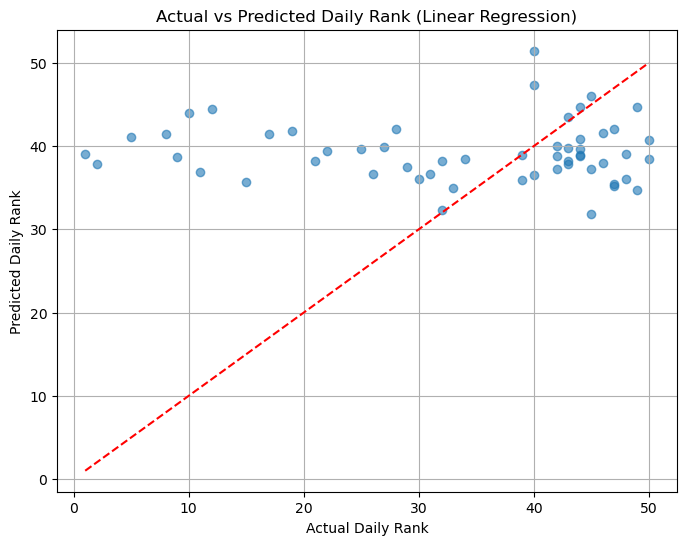

In [129]:
# Scatterplot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Daily Rank')
plt.ylabel('Predicted Daily Rank')
plt.title('Actual vs Predicted Daily Rank (Linear Regression)')
plt.grid(True)
plt.show()

# Univariate Analysis

count    273.000000
mean       0.608857
std        0.162747
min        0.093900
25%        0.510000
50%        0.620000
75%        0.730000
max        0.974000
Name: danceability, dtype: float64


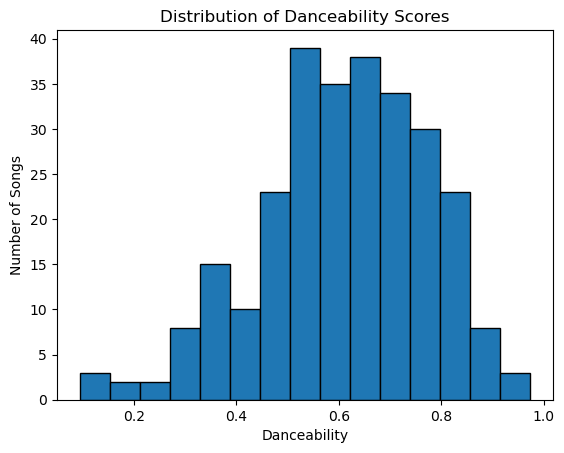

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import seaborn as sns

# Load data
df = pd.read_csv('Cleaned_Billboard_Spotify_Final.csv')

# Univariate summary
danceability_summary = df['danceability'].describe()
print(danceability_summary)

# Histogram - can you this on every feature after looking at graph comparing all the feautres from below
plt.hist(df['danceability'], bins=15, edgecolor='black')
plt.title('Distribution of Danceability Scores')
plt.xlabel('Danceability')
plt.ylabel('Number of Songs')
plt.show()

# Bivariate

#  Hypothosis Test

# Visualizations

In [109]:
# Subset Top 10 Songs
top10 = df[df['rank'] <= 10]

# Select relevant audio features
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

top10_features = top10[features]
top10_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.336,0.627,-7.463,0.0384,0.16400,0.000000,0.0708,0.3500,150.273
1,0.598,0.470,-8.744,0.0496,0.61700,0.000000,0.5050,0.8790,67.086
2,0.735,0.478,-12.472,0.0293,0.18900,0.000002,0.3550,0.9470,107.682
4,0.525,0.621,-7.364,0.1170,0.04890,0.000000,0.2910,0.5920,191.868
5,0.665,0.365,-13.030,0.0300,0.65300,0.000000,0.1090,0.8650,140.418
7,0.451,0.241,-14.014,0.0352,0.91200,0.000003,0.1750,0.6980,134.009
8,0.509,0.812,-5.439,0.0537,0.00128,0.000020,0.2140,0.6890,159.878
9,0.283,0.095,-17.828,0.0398,0.90400,0.000034,0.1280,0.1870,66.862
10,0.331,0.223,-11.274,0.0338,0.88000,0.000006,0.3430,0.3550,92.896
11,0.529,0.772,-7.013,0.0287,0.40300,0.000002,0.3160,0.8530,91.751


In [111]:
# Min-Max Scaling: (x - min) / (max - min)
top10_scaled = (top10_features - top10_features.min()) / (top10_features.max() - top10_features.min())

# Now calculate mean of each scaled feature
top10_means = top10_scaled.mean()


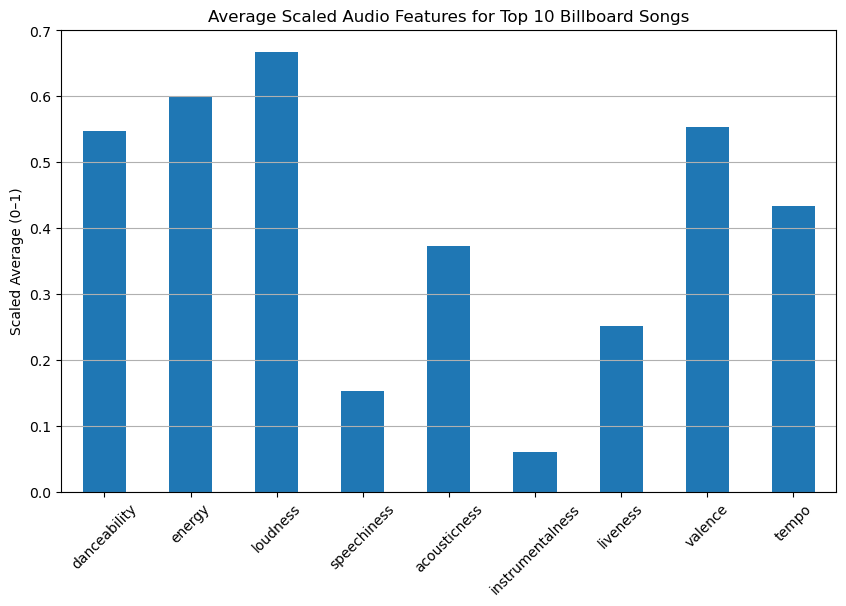

In [113]:
# Plot the results
plt.figure(figsize=(10,6))
top10_means.plot(kind='bar')
plt.title('Average Scaled Audio Features for Top 10 Billboard Songs')
plt.ylabel('Scaled Average (0–1)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()